In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load ML libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
file = 'takehome_user_engagement.csv'

In [3]:
df = pd.read_csv(file)

In [4]:
file2 = 'takehome_users.csv'

In [5]:
df2 = pd.read_csv(file2, encoding='latin_1')

In [39]:
pd.set_option('display.max_rows', None)
df.head(100)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [7]:
df2.head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [41]:
df.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [42]:
df.time_stamp = pd.to_datetime(df.time_stamp)

In [43]:
df.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [8]:
df2.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [9]:
print(df.groupby('user_id'))

In [10]:
df_agg = df.groupby('user_id').sum()

/var/folders/j5/np658np12vl9nkcgdxj9xmv00000gn/T/ipykernel_4218/2333267721.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby('user_id').sum()


In [11]:
df_agg.describe()

,visited
count,8823.000000
mean,23.565341
std,73.988152
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,606.000000


In [12]:
merged_df = df2.merge(df_agg, left_on='object_id',right_on='user_id', how='inner')

In [13]:
merged_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1


In [14]:
merged_df['invited_by_user_id'] = merged_df.invited_by_user_id.fillna(0)

In [15]:
merged_df.creation_time = pd.to_datetime(merged_df.creation_time)

In [16]:
merged_df.creation_time.head(20)

0    2014-04-22 03:53:30
1    2013-11-15 03:45:04
2    2013-03-19 23:14:52
3    2013-05-21 08:09:28
4    2013-01-17 10:14:20
5    2013-12-17 03:37:06
6    2012-12-16 13:24:32
7    2013-01-16 22:08:03
8    2013-12-26 03:55:54
9    2014-03-30 16:19:38
10   2012-10-11 16:14:33
11   2014-04-09 14:39:38
12   2013-05-24 14:56:36
13   2014-03-06 11:46:38
14   2013-01-22 12:27:42
15   2014-02-10 06:00:46
16   2012-08-17 08:30:27
17   2013-09-09 22:20:03
18   2014-02-25 00:11:13
19   2014-01-14 17:35:11
Name: creation_time, dtype: datetime64[ns]

In [17]:
merged_df['last_session_creation_time'] = merged_df.last_session_creation_time.fillna(0)

In [18]:
merged_df.isna().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
visited                       0
dtype: int64

In [19]:
merged_df.creation_source.describe()

count           8823
unique             5
top       ORG_INVITE
freq            3188
Name: creation_source, dtype: object

In [20]:
merged_df.creation_source.info

<bound method Series.info of 0             GUEST_INVITE
1               ORG_INVITE
2               ORG_INVITE
3             GUEST_INVITE
4             GUEST_INVITE
               ...        
8818            ORG_INVITE
8819    SIGNUP_GOOGLE_AUTH
8820          GUEST_INVITE
8821     PERSONAL_PROJECTS
8822                SIGNUP
Name: creation_source, Length: 8823, dtype: object>

In [21]:
# one-hot encode categorical creation_source columns
df_dum = pd.get_dummies(merged_df, columns=['creation_source'])
df_dum.head()

,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,1,0,11,10803.0,1,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,0,0,1,316.0,14,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,0,94,1525.0,1,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,0,1,5151.0,1,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,0,193,5240.0,1,1,0,0,0,0


In [22]:
df_dum.dtypes

object_id                                      int64
creation_time                         datetime64[ns]
name                                          object
email                                         object
last_session_creation_time                   float64
opted_in_to_mailing_list                       int64
enabled_for_marketing_drip                     int64
org_id                                         int64
invited_by_user_id                           float64
visited                                        int64
creation_source_GUEST_INVITE                   uint8
creation_source_ORG_INVITE                     uint8
creation_source_PERSONAL_PROJECTS              uint8
creation_source_SIGNUP                         uint8
creation_source_SIGNUP_GOOGLE_AUTH             uint8
dtype: object

In [23]:
df_dum['Domain'] = df_dum['email'].str.split('@').str[1]

In [24]:
df_dum['Domain'].describe()

count          8823
unique          812
top       gmail.com
freq           2930
Name: Domain, dtype: object

In [25]:
df_dum['Domain'].info

<bound method Series.info of 0         yahoo.com
1         gustr.com
2         gustr.com
3         yahoo.com
4         yahoo.com
           ...     
8818      gustr.com
8819      gmail.com
8820       cuvox.de
8821      iuxiw.com
8822    hotmail.com
Name: Domain, Length: 8823, dtype: object>

In [26]:
df_dum = df_dum.drop(columns=['email'])

In [27]:
df_dum.head(20)

,object_id,creation_time,name,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,Domain
0,1,2014-04-22 03:53:30,Clausen August,1.398139e+09,1,0,11,10803.0,1,1,0,0,0,0,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,1.396238e+09,0,0,1,316.0,14,0,1,0,0,0,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,1.363735e+09,0,0,94,1525.0,1,0,1,0,0,0,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,1.369210e+09,0,0,1,5151.0,1,1,0,0,0,0,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,1.358850e+09,0,0,193,5240.0,1,1,0,0,0,0,yahoo.com
5,6,2013-12-17 03:37:06,Cunha Eduardo,1.387424e+09,0,0,197,11241.0,1,1,0,0,0,0,yahoo.com
6,7,2012-12-16 13:24:32,Sewell Tyler,1.356010e+09,0,1,37,0.0,1,0,0,0,1,0,jourrapide.com
7,10,2013-01-16 22:08:03,Santos Carla,1.401833e+09,1,1,318,4143.0,284,0,1,0,0,0,gustr.com
8,11,2013-12-26 03:55:54,Paulsen Malthe,1.388117e+09,0,0,69,0.0,1,0,0,0,1,0,gustr.com
9,13,2014-03-30 16:19:38,Fry Alexander,1.396196e+09,0,0,254,11204.0,1,0,1,0,0,0,cuvox.de


In [29]:
# one-hot encode categorical domain columns
df_dum = pd.get_dummies(df_dum, columns=['Domain'])
df_dum.head()

,object_id,creation_time,name,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,creation_source_GUEST_INVITE,...,Domain_zjwjb.com,Domain_zkbxm.com,Domain_zkbzv.com,Domain_zkcdj.com,Domain_zkcep.com,Domain_zkdih.com,Domain_zpbkw.com,Domain_zpcop.com,Domain_zsrgb.com,Domain_zssin.com
0,1,2014-04-22 03:53:30,Clausen August,1.398139e+09,1,0,11,10803.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,1.396238e+09,0,0,1,316.0,14,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,1.363735e+09,0,0,94,1525.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,1.369210e+09,0,0,1,5151.0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,1.358850e+09,0,0,193,5240.0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_dum['adopted'] = 0

In [48]:
for x in df_dum['object_id']:
    visited_count = df_dum[df_dum['object_id'] == x]['visited'].values[0]
    
    if visited_count > 3:
        filtered_df = df[df['user_id'] == x]
        min_date = filtered_df['time_stamp'].min()
        max_date = filtered_df['time_stamp'].max()
        days_inbetween = (max_date - min_date).days
        
        if days_inbetween >= 7:
            df_dum.loc[df_dum['object_id'] == x, 'adopted'] = 1


In [50]:
df_dum.head(50)

,object_id,creation_time,name,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,creation_source_GUEST_INVITE,...,Domain_zkbxm.com,Domain_zkbzv.com,Domain_zkcdj.com,Domain_zkcep.com,Domain_zkdih.com,Domain_zpbkw.com,Domain_zpcop.com,Domain_zsrgb.com,Domain_zssin.com,adopted
0,1,2014-04-22 03:53:30,Clausen August,1.398139e+09,1,0,11,10803.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,1.396238e+09,0,0,1,316.0,14,0,...,0,0,0,0,0,0,0,0,0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,1.363735e+09,0,0,94,1525.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,1.369210e+09,0,0,1,5151.0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,1.358850e+09,0,0,193,5240.0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,1.387424e+09,0,0,197,11241.0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,1.356010e+09,0,1,37,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,10,2013-01-16 22:08:03,Santos Carla,1.401833e+09,1,1,318,4143.0,284,0,...,0,0,0,0,0,0,0,0,0,1
8,11,2013-12-26 03:55:54,Paulsen Malthe,1.388117e+09,0,0,69,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,13,2014-03-30 16:19:38,Fry Alexander,1.396196e+09,0,0,254,11204.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df_dum['last_session_creation_time']=pd.to_datetime(df_dum['last_session_creation_time'], unit='s')

In [91]:
df_dum['last_session_creation_time'].head(20)

0    2014-04-22 03:53:30
1    2014-03-31 03:45:04
2    2013-03-19 23:14:52
3    2013-05-22 08:09:28
4    2013-01-22 10:14:20
5    2013-12-19 03:37:06
6    2012-12-20 13:24:32
7    2014-06-03 22:08:03
8    2013-12-27 03:55:54
9    2014-03-30 16:19:38
10   2012-10-12 16:14:33
11   2014-04-12 14:39:38
12   2013-05-30 14:56:36
13   2014-05-29 11:46:38
14   2013-01-22 12:27:42
15   2014-02-10 06:00:46
16   2012-08-18 08:30:27
17   2013-09-09 22:20:03
18   2014-02-26 00:11:13
19   2014-01-15 17:35:11
Name: last_session_creation_time, dtype: datetime64[ns]

In [89]:
acct_time = (df_dum['last_session_creation_time'] - df_dum['creation_time']).dt.days

In [90]:
acct_time.head()

0      0
1    136
2      0
3      1
4      5
dtype: int64

In [92]:
df_dum['account_active_days'] = (df_dum['last_session_creation_time'] - df_dum['creation_time']).dt.days

In [93]:
df_dum.head(30)

,object_id,creation_time,name,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,creation_source_GUEST_INVITE,...,Domain_zkbzv.com,Domain_zkcdj.com,Domain_zkcep.com,Domain_zkdih.com,Domain_zpbkw.com,Domain_zpcop.com,Domain_zsrgb.com,Domain_zssin.com,adopted,account_active_days
0,1,2014-04-22 03:53:30,Clausen August,2014-04-22 03:53:30,1,0,11,10803.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,2014-03-31 03:45:04,0,0,1,316.0,14,0,...,0,0,0,0,0,0,0,0,1,136
2,3,2013-03-19 23:14:52,Bottrill Mitchell,2013-03-19 23:14:52,0,0,94,1525.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,2013-05-22 08:09:28,0,0,1,5151.0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,5,2013-01-17 10:14:20,Raw Grace,2013-01-22 10:14:20,0,0,193,5240.0,1,1,...,0,0,0,0,0,0,0,0,0,5
5,6,2013-12-17 03:37:06,Cunha Eduardo,2013-12-19 03:37:06,0,0,197,11241.0,1,1,...,0,0,0,0,0,0,0,0,0,2
6,7,2012-12-16 13:24:32,Sewell Tyler,2012-12-20 13:24:32,0,1,37,0.0,1,0,...,0,0,0,0,0,0,0,0,0,4
7,10,2013-01-16 22:08:03,Santos Carla,2014-06-03 22:08:03,1,1,318,4143.0,284,0,...,0,0,0,0,0,0,0,0,1,503
8,11,2013-12-26 03:55:54,Paulsen Malthe,2013-12-27 03:55:54,0,0,69,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,13,2014-03-30 16:19:38,Fry Alexander,2014-03-30 16:19:38,0,0,254,11204.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
y= df_dum['adopted']

In [95]:
X = df_dum.drop(columns=['adopted','name','creation_time', 'last_session_creation_time','object_id','visited'])

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [97]:
#Using Random Forest to determine hyperparameter tuning for n_estimators
train_scores = []
n_estimators =  [100, 500, 1000]
for i in n_estimators:

    forest = RandomForestClassifier(n_estimators = i, random_state=42)
    forest.fit(X_train, y_train)
    
    train_scores.append(forest.score(X_train,y_train))
    print('Train Scores:',train_scores)

Train Scores: [1.0]
Train Scores: [1.0, 1.0]
Train Scores: [1.0, 1.0, 1.0]


In [98]:
max_train = max(train_scores)
indext = train_scores.index(max_train)
print(indext)

0


In [99]:
forest = RandomForestClassifier(n_estimators = 100, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [100]:
# Make predictions on the test data and evaluate the model
predictions = forest.predict(X_test)
accuracy = forest.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9701548923309407


In [101]:
#Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print(cm)

[[2004   30]
 [  49  564]]


<Axes: >

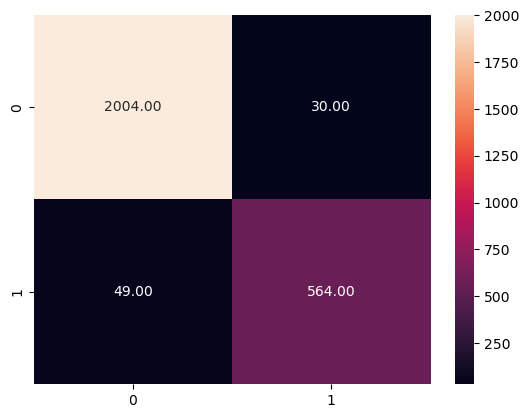

In [102]:
sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt=".2F")

In [103]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2034
           1       0.95      0.92      0.93       613

    accuracy                           0.97      2647
   macro avg       0.96      0.95      0.96      2647
weighted avg       0.97      0.97      0.97      2647



30


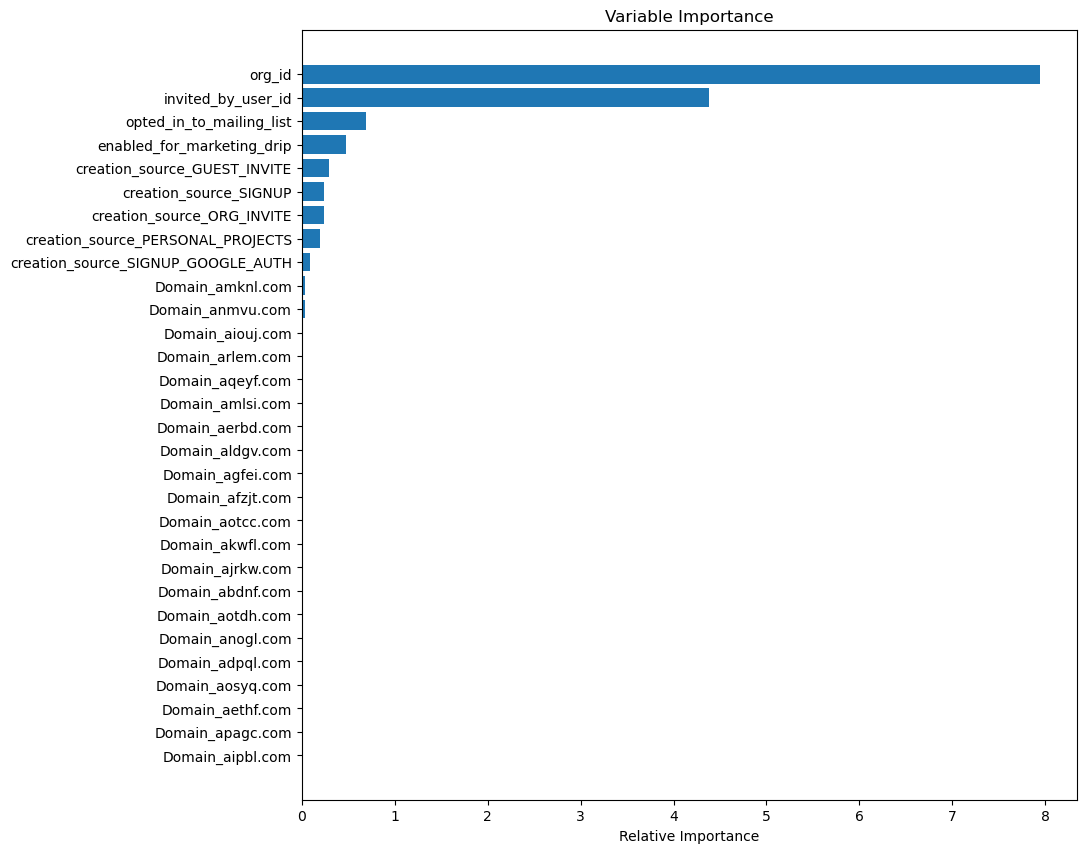

In [106]:
feature_importance = forest.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [105]:
pd.Series(abs(forest.feature_importances_), index=X.columns).sort_values(ascending=False)

account_active_days                   8.250007e-01
org_id                                6.550866e-02
invited_by_user_id                    3.614650e-02
opted_in_to_mailing_list              5.738248e-03
enabled_for_marketing_drip            3.970548e-03
Domain_hotmail.com                    3.079750e-03
Domain_gmail.com                      2.813182e-03
Domain_yahoo.com                      2.555122e-03
creation_source_GUEST_INVITE          2.435933e-03
Domain_jourrapide.com                 2.238927e-03
Domain_gustr.com                      2.116135e-03
creation_source_SIGNUP                1.982724e-03
creation_source_ORG_INVITE            1.964342e-03
Domain_cuvox.de                       1.933944e-03
creation_source_PERSONAL_PROJECTS     1.630534e-03
creation_source_SIGNUP_GOOGLE_AUTH    6.985730e-04
Domain_rmlsj.com                      5.498013e-04
Domain_egsva.com                      5.405952e-04
Domain_ncvyi.com                      5.318578e-04
Domain_fizyt.com               

Identify which factors predict future user adoption:
1. Number of days the account has been active.  Users who have been using the account the longest are the adopters.
1. org_id -> the organization the user is a part an important role in whether the user will be an adopted user.
2. invited_by_user_id -> This is important.  This may be a network effect, where the recommendtaion from a familiar user will increase the odds of adoption.
3. opted_in_to_mailing_list, enabled_for_marketing_drip -> Both probably indicate that the user is enthusiastic about the product and wants to learn more about it,
4. Email domain does not play a role in the prediction of which users will become adopters. 
Overall I would focus on what organizations the users belong to, who is recommending the the new users who become adopters and whether the user opts in to email/marketing campaign. 